# **Statistical Methods and Applications 1**
## **Final Project Report and Presentation**

#### **Team Members:**
Dalvi Mayur, Dinesh Subashree, Nemade Suyog, Singh Aryaman


# **Black Friday Sales Insights: How Demographics Influence Purchase Behaviour**

This study delves into the intricate dynamics of consumer behavior during Black Friday deals, emphasizing the pivotal role of demographics in shaping purchasing habits.

Methods: Utilized statistical techniques such as correlation analysis and hypothesis testing on an extensive Black Friday dataset.

Key Findings: Notable differences in product categories chosen by different age groups and marital statuses, indicating potential for specialized marketing campaigns.

Implications: Valuable insights for retailers to optimize marketing strategies and inventory planning.


### **Data:**
The data is sourced from:

Chandel, S. (2018, November 12). Black-Friday-Dataset. Retrieved February 19, 2021, from https://github.com/shwetachandel/Black-Friday-Dataset.

### **Data Schema:**
**Product id** - lot of product ids

**Gender** - male/ female – 0 or 1

**Age** - '0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25' yrs

**Occupation** - 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21- total 21 categories

**City category** – 1,2,3

**Marital status** - 0,1

**Product category** - lot of different product category

**Purchase** - lot of purchase numbers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Analysis**

The dataset encompasses various informative features suitable for analyzing Black Friday sales patterns. However, certain columns in the dataset are unsuitable for analysis due to the presence of NaN (Not a Number) values. Therefore, data cleaning is essential before proceeding with further analysis.

In the preprocessing phase, we undertake the following steps:

* Inspecting for null values and removing the 'Product_Category_2' and 'Product_Category_3' columns from the dataset.
* Examining the unique values in each column and evaluating whether any modifications are necessary.
* Reframing the encoded columns to enhance their interpretability.







In [1]:
# import libraries
import pandas as pd

In [3]:
# Load data
data_raw = pd.read_csv('train.csv')
data_raw.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data_raw.shape

(550068, 12)

In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
data_raw.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## **Reframing**

In [7]:
# User_ID data preprocess. e.g. 1000002 -> 2
data_raw['User_ID'] = data_raw['User_ID'] - 1000000

In [8]:
# Product_ID preprocess e.g. P00069042 -> 69042
data_raw['Product_ID'] = data_raw['Product_ID'].str.replace('P00', '')

## **Inspecting for Null Values**

In [9]:
# Checking for null values
data_raw.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

The columns 'Product_Category_2' and 'Product_Category_3' have a significant amount of null values so we can exclude them from our dataset


In [10]:
# droppping 'Product_Category_2' and 'Product_Category_3' from the dataframe
data_raw = data_raw.drop('Product_Category_2', axis=1)
data_raw = data_raw.drop('Product_Category_3', axis=1)
data_raw = data_raw.rename(columns={'Product_Category_1': 'Product_Category'})

## **Examining Unique Values in each column:**

In [11]:
# Checking for Unique values
for column in data_raw.columns:
  print(column)
  print(data_raw[column].unique())

User_ID
[   1    2    3 ... 4113 5391 1529]
Product_ID
['069042' '248942' '087842' ... '370293' '371644' '370853']
Gender
['F' 'M']
Age
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category
['A' 'C' 'B']
Stay_In_Current_City_Years
['2' '4+' '3' '1' '0']
Marital_Status
[0 1]
Product_Category
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Purchase
[ 8370 15200  1422 ...   135   123   613]


From this we can see that the dataset contains the following observations:

Gender - ['F' 'M']

Age - ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Occupation - [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

City_Category - ['A' 'C' 'B']

Stay_In_Current_City_Years - ['0' '1' '2' '3' '4+']

Marital_Status - [0 1]

In [12]:
# Checking the data type
data_raw.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

## **Reframing the Encoded Columns**

In [13]:
# Based on the data source, changing the values to a more relevant name for further analysis
data = data_raw
city_dict = {'A': 'Country Side', 'B': 'City', 'C': 'Suburbs'}
data['City_Category'] = data['City_Category'].replace(city_dict)

maritial_dict = {0: 'Married', 1: 'Single'}
data['Marital_Status'] = data['Marital_Status'].replace(maritial_dict)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1,069042,F,0-17,10,Country Side,2,Married,3,8370
1,1,248942,F,0-17,10,Country Side,2,Married,1,15200
2,1,087842,F,0-17,10,Country Side,2,Married,12,1422
3,1,085442,F,0-17,10,Country Side,2,Married,12,1057
4,2,285442,M,55+,16,Suburbs,4+,Married,8,7969


## **Data Visualization**

## Purchase Pattern and Age Group

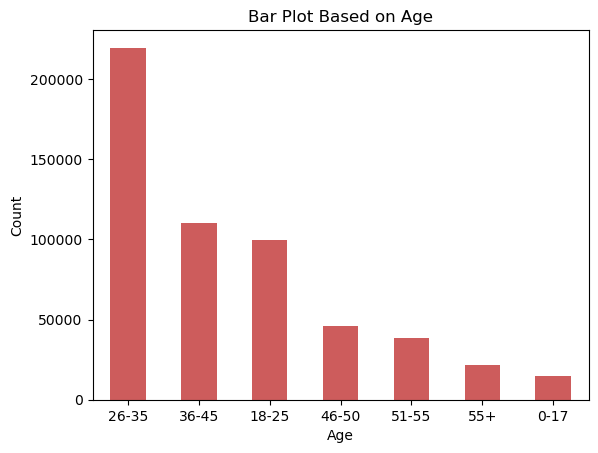

In [14]:
import matplotlib.pyplot as plt

age_counts = data['Age'].value_counts()

# Create a bar plot
age_counts.plot(kind='bar', color='indianred')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Bar Plot Based on Age')
plt.xticks(rotation=360, ha='center')

# Display the plot
plt.show()


This plot shows how the purchase pattern varies between age groups. The age group 26-35 spends more. This might be because they come under young working adults. Factors like responsibilities, salaries, requirements all may contribut to this.

## Purchase Pattern and Gender

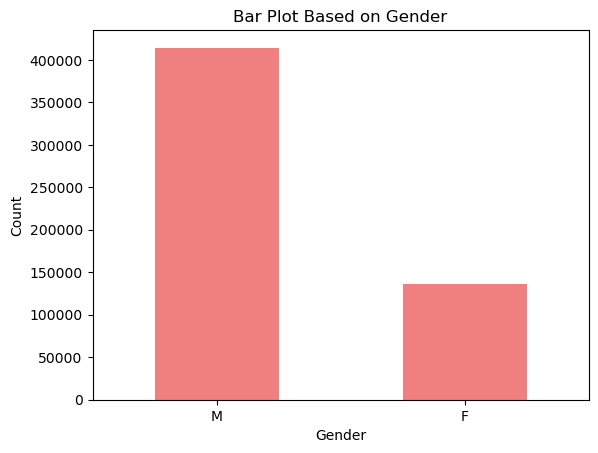

In [15]:
gender = data['Gender'].value_counts()

# Create a bar plot
gender.plot(kind='bar', color='lightcoral')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Plot Based on Gender')
plt.xticks(rotation=360, ha='center')

# Display the plot
plt.show()

This plot shows us how the gender plays a role in the purchase pattern. It is evident that Male customers spend more compared to Female customers.

## Purchase pattern based on Product Category

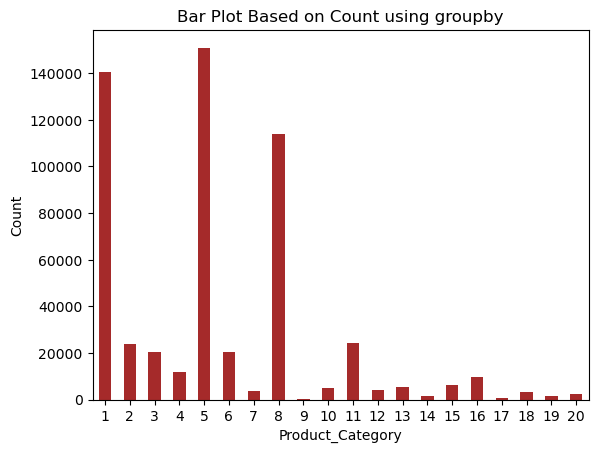

In [16]:
counts = data.groupby('Product_Category').size()

# Create a bar plot
ax = counts.plot(kind='bar', color='brown')

# Add labels and title
plt.xlabel('Product_Category')
plt.ylabel('Count')
plt.title('Bar Plot Based on Count using groupby')
plt.xticks(rotation=360, ha='center')


# Display the plot
plt.show()

This plot shows how a product influences purchase pattern. Certain products are sold more than the other.

## Purchase Pattern based on City Category

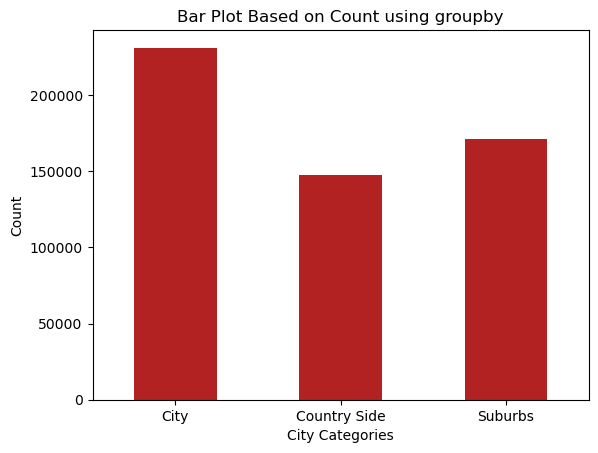

In [17]:
counts = data.groupby('City_Category').size()

# Create a bar plot
ax = counts.plot(kind='bar', color='firebrick')

# Add labels and title
plt.xlabel('City Categories')
plt.ylabel('Count')
plt.title('Bar Plot Based on Count using groupby')
plt.xticks(rotation=360, ha='center')


# Display the plot
plt.show()

This plot shows an interesting pattern where people in city contribute to the purchase history more compared to Country Side and Suburban population. This is followed by Suburbas and Country Side. This can be due to the fact that most working population resides in Cities.

## Purchase Pattern based on Marital Status

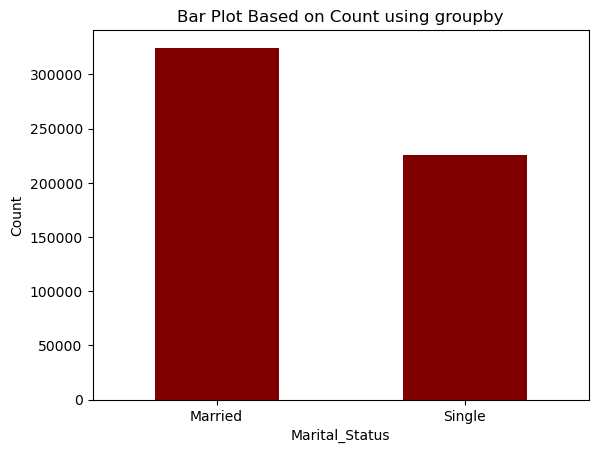

In [18]:
counts = data.groupby('Marital_Status').size()

# Create a bar plot
ax = counts.plot(kind='bar', color='maroon')

# Add labels and title
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title('Bar Plot Based on Count using groupby')
plt.xticks(rotation=360, ha='center')


# Display the plot
plt.show()

This plot shows how the Marital status affects the purchase pattern. It is evident that Married individuals spend more compared to Singles. This might be becaiuse of dual income and added reponsibilities.

## Purchase Pattern based on Age Group in Differnt City Categories

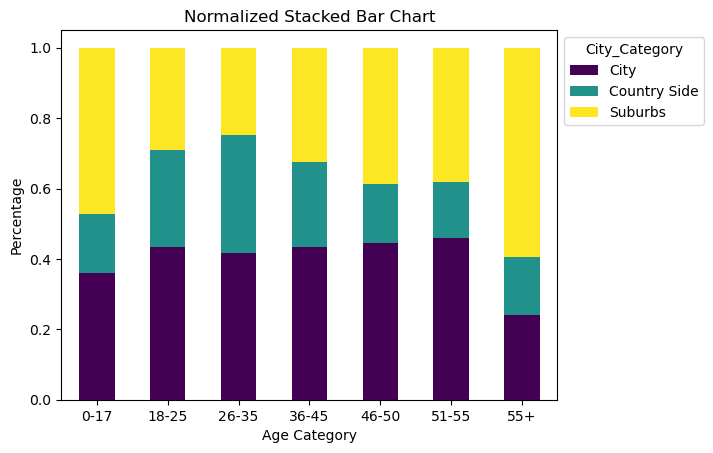

In [19]:
# Group by 'Category' and sum the values
df_subset = data[['Age', 'City_Category']]

grouped_df = df_subset.groupby(['Age', 'City_Category']).size().unstack()

# Normalize the data
normalized_df = grouped_df.div(grouped_df.sum(axis=1), axis=0)

# Create a stacked bar chart
ax = normalized_df.plot(kind='bar', stacked=True, colormap='viridis')

# Add labels and title
plt.xlabel('Age Category')
plt.ylabel('Percentage')
plt.title('Normalized Stacked Bar Chart')
plt.xticks(rotation=360, ha='center')


# Display the plot
plt.legend(title='City_Category', bbox_to_anchor=(1, 1))
plt.show()


This plot shows some interesting patterns in the purchase history. It shows how different agegroups have a different purchase pattern in differnt city categories. We can see how the age groups 18-25, 26-35, 36-45, 46-50 all have similar purchase pattern in the City category while it differs with the Countryside category.

# **Hypothesis Testing**

# **Hypothesis Test 1**

**Population:** Here the population is the Black Friday Sales in United States

**Sample:** The sample dataset is the purchases made by Male and Female customers.

**Objective:** We claim that there is no difference in the spending habbits between male and female customers  

**Null Hypothesis (H0):** The average purchase amount for male and female customers is the same.
$$ H_0 : \mu_{male} = \mu_{female}$$

**Alternative Hypothesis (H1):** There is a significant difference in the average purchase amount between male and female customers.
$$ H_1 : \mu_{male} \not= \mu_{female}$$

In [20]:
import scipy.stats as stats

# Sample data (replace this with your actual dataset)
data_male = data[data['Gender'] == 'M']['Purchase']
data_female = data[data['Gender'] == 'F']['Purchase']

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(data_male, data_female, equal_var=False)

# Set the significance level
alpha = 0.05

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average purchase amounts between male and female customers.")

    # Check which gender has a higher average purchase amount
    if data_male.mean() > data_female.mean():
        print('mean of male purchases: ', data_male.mean())
        print('mean of female purchases: ', data_female.mean())

        print("Male customers have a higher average purchase amount.")
    else:
        print("Female customers have a higher average purchase amount.")

else:
    print("Fail to reject the null hypothesis. There is no significant difference in average purchase amounts between male and female customers.")

T-statistic: 46.358248669626064
P-value: 0.0
Reject the null hypothesis. There is a significant difference in average purchase amounts between male and female customers.
mean of male purchases:  9437.526040472265
mean of female purchases:  8734.565765155476
Male customers have a higher average purchase amount.


## **Test Interpretation:**

The computed t-statistic is 46.36, indicating a substantial difference between the average purchase amounts of male and female customers.

The p-value is less than the chosen significance level (alpha = 0.05). Therefore, we reject the null hypothesis.

The direction of the difference in means is given by the sign of the t-statistic. In this case, the positive t-statistic (46.36) indicates that male customers, on average, have a higher purchase amount compared to female customers.

Based on the t-test, we can conclude that, in the hypothetical data, there is a statistically significant difference in average purchase amounts between male and female customers, and male customers tend to have a higher average purchase amount

# **Hypothesis Test 2**

**Population:** Here the population is the Black Friday Sales in United States

**Sample:** The sample dataset is the purchases made by married and single customers in different city categories.

**Objective:** We claim that Marital status and city category are independent.

**Null Hypothesis (H0):** Marital status and city category are independent.
$$ H_0 : Marital \  Status \  and \  City \  Category \  are \
 independent $$

**Alternative Hypothesis (H1):** Marital status and city category are not independent; there is an association between them.
$$ H_1 : Marital \ Status \ and \ City \ Category \ are \ not \ independent
$$

**Test:** We can use chi-square test as we need to find the extent of association between two categorical variables


In [21]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Marital_Status'], data['City_Category'])

# Perform the chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-square statistic: {chi2_stat}')
print(f'P-value: {p_value}')

# Compare p-value with significance level to make a decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Marital status and city category are not independent.")
else:
    print("Fail to reject the null hypothesis. Marital status and city category are independent.")


Chi-square statistic: 870.9131695144557
P-value: 7.649061125706496e-190
Reject the null hypothesis. Marital status and city category are not independent.


## **Test Interpretation:**

The chi-square statistic is a measure of the extent of the association between the two categorical variables. In this case, the large chi-square value suggests a substantial association between Marital Status and City Category.

The p-value is extremely small, significantly below the common significance level of 0.05. This indicates strong evidence against the null hypothesis.

The rejection of the null hypothesis suggests that there is a significant association between Marital Status and City Category. In other words, these two variables are not independent of each other.

While the test shows an association, it doesn't provide information on the strength or direction of the association. Additional analyses or visualization techniques will help with a more detailed understanding.

To Visualize this, we can create a stacked bar chart with the contigency table.

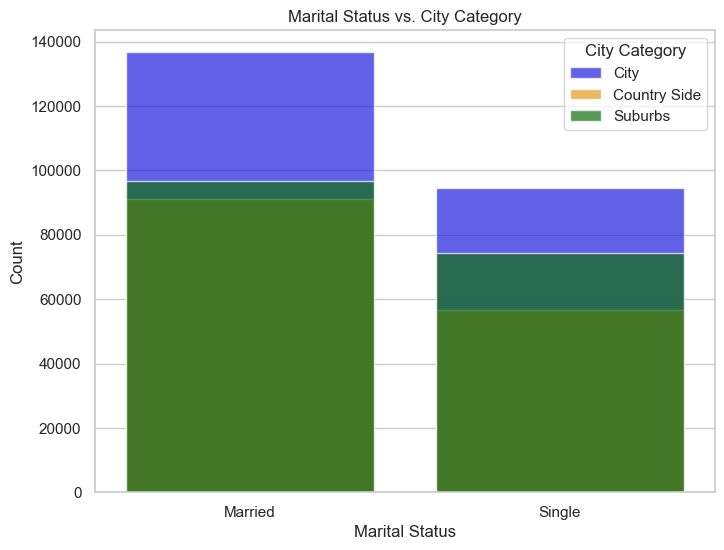

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a contingency table
contingency_table = pd.crosstab(data['Marital_Status'], data['City_Category'])
contingency_table


# Plot a stacked bar chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=contingency_table.index, y=contingency_table['City'], color='blue', label='City', alpha=0.7)
sns.barplot(x=contingency_table.index, y=contingency_table['Country Side'], color='orange', label='Country Side', alpha=0.7)
sns.barplot(x=contingency_table.index, y=contingency_table['Suburbs'], color='green', label='Suburbs', alpha=0.7)

plt.title('Marital Status vs. City Category')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='City Category')
plt.show()

 This visualization provides a clear picture of how the counts are distributed across marital status and city categories. It seems that the distribution of married individuals is more skewed towards the "City" category, while single individuals have a more balanced distribution across "City" categories.

# **Hypothesis Test 3**


**Population:** Here the population is the Black Friday Sales in United States

**Sample:** The sample dataset is the purchases made by married and single customers in different city categories.

**Objective:** We claim that Marital status and city category are independent.

**Null Hypothesis (H0):** There is no significant difference in purchase quantities across job groups.
$$ H_0 : \mu_{(Occupation \ 1)} = \mu_{(Occupation \ 2)} = ... = \mu_{(Occupation \ 21)} $$

**Alternative Hypothesis (H1):** There is a significant difference in purchase quantities across at least one pair of job groups.
$$ H_1 : At \ least \ one \ pair \ of \ means \ is \ different
$$

**Test:** We can use analysis of variance (ANOVA), which compares means across multiple groups.

In [23]:
from scipy.stats import f_oneway

# Extract 'Purchase' values for different occupation groups
occupations = data['Occupation'].unique()
occupation_groups = [data[data['Occupation'] == occ]['Purchase'] for occ in occupations]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*occupation_groups)

# Set significance level
alpha = 0.05

# Print results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Compare p-value with significance level
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in purchase amounts among different occupation groups.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in purchase amounts among different occupation groups.')


F-statistic: 98.47377546928172
P-value: 0.0
Reject the null hypothesis: There is a significant difference in purchase amounts among different occupation groups.


## **Test Interpretation:**

The F-statistic is a measure of the variability between group means relative to the variability within groups. In this case, the high F-statistic suggests that there is a significant difference in the average purchase amounts across occupation groups.

The p-value is extremely low, essentially zero. This indicates strong evidence against the null hypothesis.

The rejection of the null hypothesis suggests that at least one pair of occupation groups has different average purchase amounts. In other words, the average purchase amounts are not the same across all occupation groups.

In summary, based on the ANOVA test, there is strong evidence to suggest that there are significant differences in purchase amounts among different occupation groups in the dataset. This finding provides insights into the variations in consumer behavior across various job categories.

# **Hypothesis Test 4**

**Population:** Here the population is the Black Friday Sales in United States

**Sample:** The sample dataset is the purchases made by people in different age groups.

**Objective:** We claim that there is no significant difference in purchase amounts between different age groups

**Null Hypothesis (H0):** There is no significant difference in purchase amounts across age groups.
$$ H_0 : \mu_{(0-17)} = \mu_{(18-25)} = ... = \mu_{(55+)} $$

**Alternative Hypothesis (H1):** TThere is a significant difference in purchase amounts across at least one pair of age groups.
$$ H_1 : At \ least \ one \ pair \ of \ means \ is \ different
$$

**Test:** We can use analysis of variance (ANOVA), which compares means across multiple groups.

In [24]:
from scipy.stats import f_oneway

# Extract 'Purchase' values for different occupation groups
age_list = data['Age'].unique()
age_groups = [data[data['Age'] == age]['Purchase'] for age in age_list]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*age_groups)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Compare p-value with significance level to make a decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in purchase amounts across age groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in purchase amounts across age groups.")


F-statistic: 40.57579909450408
P-value: 1.053563939251671e-49
Reject the null hypothesis. There is a significant difference in purchase amounts across age groups.


## **Test Interpretation:**

The result of the ANOVA test indicates a statistically significant difference in purchase amounts across different age groups.

The F-statistic is a measure of the variability between group means relative to the variability within groups. In this case, the high F-statistic of 40.58 suggests that there is a significant difference in the average purchase amounts across different age groups.

The p-value is extremely low, essentially zero. This indicates strong evidence against the null hypothesis.

The rejection of the null hypothesis suggests that at least one pair of age groups has different average purchase amounts. In other words, the average purchase amounts are not the same across all age groups.

To visualize this, we can create a box plot.

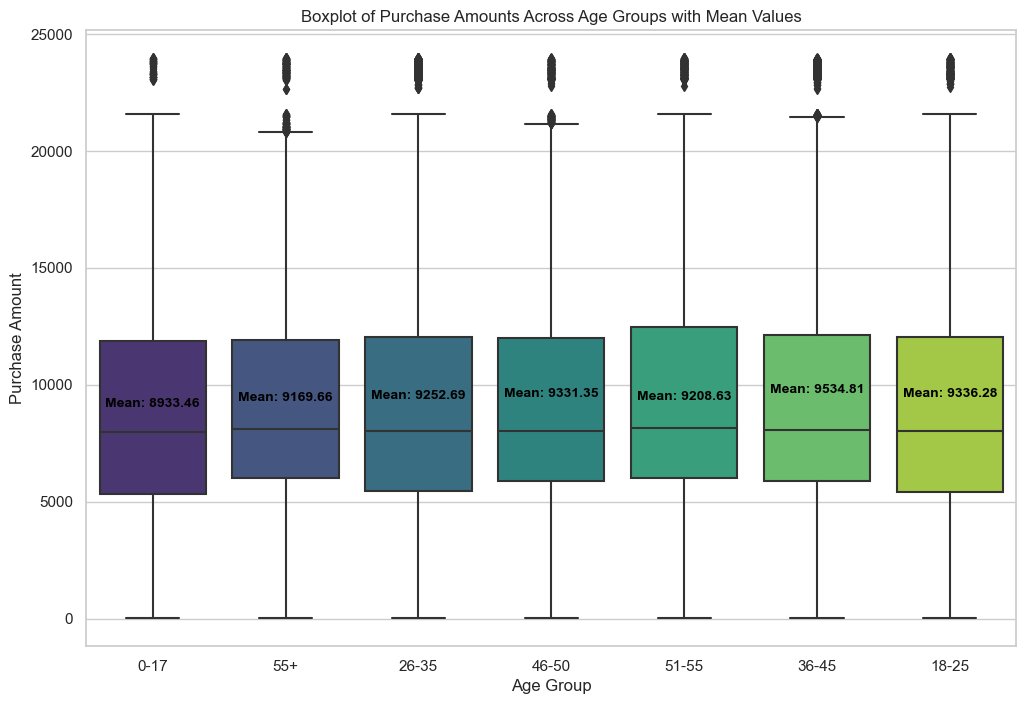

In [25]:
# Create a boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Age', y='Purchase', data=data, palette='viridis')

# Annotate mean values
means = data.groupby('Age')['Purchase'].mean().round(2)
for i, mean in enumerate(means):
    ax.text(i, mean, f'Mean: {mean}', ha='center', va='bottom', fontweight='bold', color='black', fontsize=10)

plt.title('Boxplot of Purchase Amounts Across Age Groups with Mean Values')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()

 The boxes are noticeably different in length and the medians are at different positions, it suggests variability in the central tendency of purchase amounts among age groups.

 The significant difference in means (as indicated by the hypothesis test results) is reflected in the visual differences in the boxplot.

 In summary, the boxplot with mean values serves as a complementary visualization to the hypothesis test, offering a more intuitive understanding of how purchase amounts vary across different age groups. The observed differences in central tendency and spread in the plot are consistent with the rejection of the null hypothesis, providing additional insight into the practical significance of the findings.

# **Hypothesis Test 5**

**Population:** Here the population is the Black Friday Sales in United States

**Sample:** The sample dataset is the purchases made by people with duration of stay in the current city.

**Objective:** We claim that there is no significant difference in purchase amounts across different durations of stay in the current city.

**Null Hypothesis (H0):** There is no significant difference in purchase amounts across different durations of stay in the current city.
$$ H_0 : \mu_{(1 \ year)} = \mu_{(2 \ years)} = ... = \mu_{(4+ \  years)} $$

**Alternative Hypothesis (H1):** There is a significant difference in purchase amounts across at least one pair of duration categories.
$$ H_1 : At \ least \ one \ pair \ of \ means \ is \ different
$$

**Test:** We can use analysis of variance (ANOVA), which compares means across multiple groups.

In [26]:
# Perform ANOVA
f_statistic, p_value = f_oneway(data['Purchase'][data['Stay_In_Current_City_Years'] == '0'],
                                 data['Purchase'][data['Stay_In_Current_City_Years'] == '1'],
                                 data['Purchase'][data['Stay_In_Current_City_Years'] == '2'],
                                 data['Purchase'][data['Stay_In_Current_City_Years'] == '3'],
                                 data['Purchase'][data['Stay_In_Current_City_Years'] == '4+'])


# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Compare p-value with significance level to make a decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in purchase amounts across different durations of stay.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in purchase amounts across different durations of stay.")

F-statistic: 9.382655346642094
P-value: 1.4011435777855407e-07
Reject the null hypothesis. There is a significant difference in purchase amounts across different durations of stay.


## **Test Interpretation:**

The result of the hypothesis test indicates a small difference in purchase amounts across different durations of stay in the current city.

The F-statistic is a measure of the variance between group means relative to the variance within groups. In this case, it is 9.38.

The p-value is below the significance level of 0.05. Since the p-value is below the significance level, we reject the null hypothesis.

The small p-value suggests that the observed differences in purchase amounts among different duration categories are unlikely to have occurred by random chance alone.

In summary, the statistical analysis provides strong evidence to conclude that there are significant differences in purchase amounts across different durations of stay in the current city.

This can be better visualized by using a

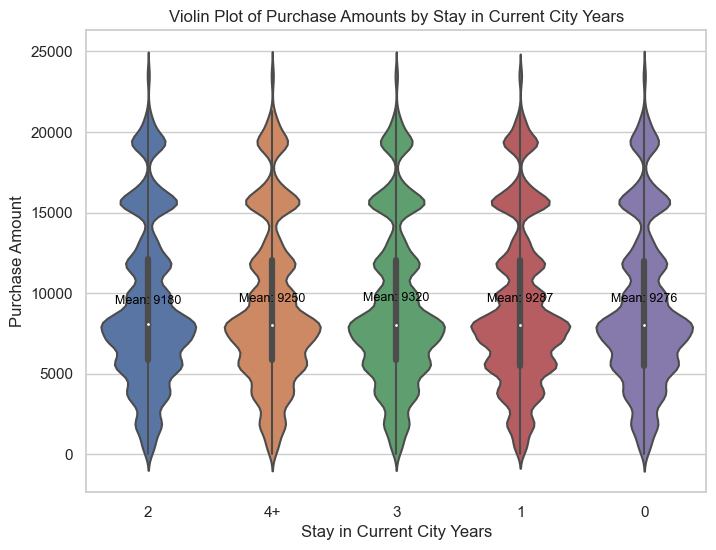

In [27]:
# Create a violin plot
plt.figure(figsize=(8, 6))
ax = sns.violinplot(x='Stay_In_Current_City_Years', y='Purchase', data=data, showmeans=True, meanline=True)

# Annotate with mean values
means = data.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
for i, mean_val in enumerate(means):
    ax.text(i, mean_val, f'Mean: {mean_val:.0f}', ha='center', va='bottom', color='black', fontsize=9)

plt.title('Violin Plot of Purchase Amounts by Stay in Current City Years')
plt.xlabel('Stay in Current City Years')
plt.ylabel('Purchase Amount')
plt.show()

The F-statistic is calculated as part of the analysis of variance (ANOVA) test. It compares the variability between the group means to the variability within the groups. A large F-statistic suggests that the means of at least one pair of groups are significantly different. In our test the F-statistic is 9.382.

In the context of the means in the plot above, if the F-statistic is large and the associated p-value is below the chosen significance level (commonly 0.05), it indicates that there are significant differences in purchase amounts across different durations of stay.

Here, the difference with mean is not huge. While statistical significance is important, it's also crucial to consider practical significance. Even if the F-statistic is significant, we assess whether the observed differences are practically meaningful or substantial.

In summary, the F-statistic helps assess whether there are significant differences in purchase amounts across different durations of stay in the current city. If the F-statistic is large and the associated p-value is below the significance level, it suggests that at least one pair of duration categories has different mean purchase amounts.